# Context
John Doe remarked in [#AP1432](http://www.example.com/justalink) that there may be too much code in our application that isn't used at all. Before migrating the application to the new platform, we have to analyze which parts of the system are still in use and which are not.

# Idea
To understand how much code isn't used, we recorded the executed code in production with the coverage tool [JaCoCo](http://www.jacoco.org/). The measurement took place between 21st Oct 2017 and 27st Oct 2017. The results were exported into a CSV file using the JaCoCo command line tool with the following command:

```bash
java -jar jacococli.jar report "C:\Temp\jacoco.exec" --classfiles \
C:\dev\repos\buschmais-spring-petclinic\target\classes --csv jacoco.csv
```

The CSV file contains all lines of code that were passed through during the measurement's time span. We just take the relevant data and add an additional `LINES` column to be able to calculate the ratio between covered and missed lines later on.

In [1]:
import pandas as pd
coverage = pd.read_csv("datasets/jacoco.csv")
coverage = coverage[['PACKAGE', 'CLASS', 'LINE_COVERED' ,'LINE_MISSED']]
coverage['LINES'] = coverage.LINE_COVERED + coverage.LINE_MISSED
coverage.head(1)

,PACKAGE,CLASS,LINE_COVERED,LINE_MISSED,LINES
0,org.springframework.samples.petclinic,PetclinicInitializer,24,0,24


# Analysis
It was stated that whole packages wouldn't be needed anymore and that they could be safely removed. Therefore, we sum up the coverage data per class for each package and calculate the coverage ratio for each package.

In [2]:
grouped_by_packages = coverage.groupby("PACKAGE").sum()
grouped_by_packages['RATIO'] = grouped_by_packages.LINE_COVERED / grouped_by_packages.LINES
grouped_by_packages = grouped_by_packages.sort_values(by='RATIO')
grouped_by_packages

,LINE_COVERED,LINE_MISSED,LINES,RATIO
PACKAGE,,,,
org.springframework.samples.petclinic.repository.jdbc,0,150,150,0.000000
org.springframework.samples.petclinic.util,13,17,30,0.433333
org.springframework.samples.petclinic.web,75,40,115,0.652174
org.springframework.samples.petclinic.model,75,33,108,0.694444
org.springframework.samples.petclinic.repository.jpa,21,7,28,0.750000
org.springframework.samples.petclinic.service,16,2,18,0.888889
org.springframework.samples.petclinic,24,0,24,1.000000


We plot the data for the coverage ratio to get a brief overview of the result.

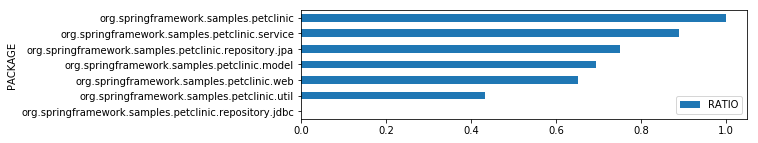

In [3]:
%matplotlib inline
grouped_by_packages[['RATIO']].plot(kind="barh", figsize=(8,2))

# Conclusion 
The JDBC package `org.springframework.samples.petclinic.repository.jdbc` isn't used at all and can be left out safely when migrating to the new platform.